# 6.4: Supervised Machine Learning: Regression

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import geopandas
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\6. Advanced Analytics & Dashboard Design\Global Superstore_Data Analysis Project'

In [4]:
super_store = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'superstore_clean.csv'))

# 2. Data cleaning

In [5]:
super_store.columns

Index(['Unnamed: 0', 'Category', 'City', 'Country', 'Customer.ID', 'Discount',
       'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID',
       'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales',
       'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [7]:
super_store.head()

,Unnamed: 0,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,0,Office Supplies,Los Angeles,United States,LS-172304,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,1,Office Supplies,Los Angeles,United States,MV-174854,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,2,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,3,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,4,Office Supplies,Los Angeles,United States,AP-109154,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [8]:
super_store.shape

(51290, 26)

In [9]:
# Check for missing values

super_store.isnull().sum()

# No missing values to handle

Unnamed: 0        0
Category          0
City              0
Country           0
Customer.ID       0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [10]:
dups = super_store.duplicated()

In [11]:
dups.shape # No dups

(51290,)

C:\Users\Tim\AppData\Local\Temp\ipykernel_11104\1135177236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(super_store['Profit'], bins=25) # Shows extreme values


<Axes: xlabel='Profit', ylabel='Density'>

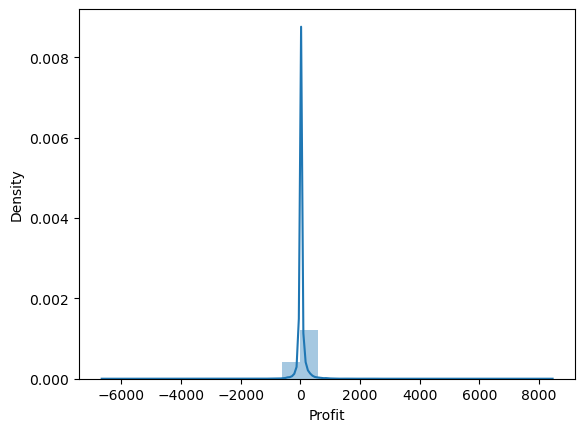

In [12]:
sns.distplot(super_store['Profit'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\Tim\AppData\Local\Temp\ipykernel_11104\2417338077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(super_store['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

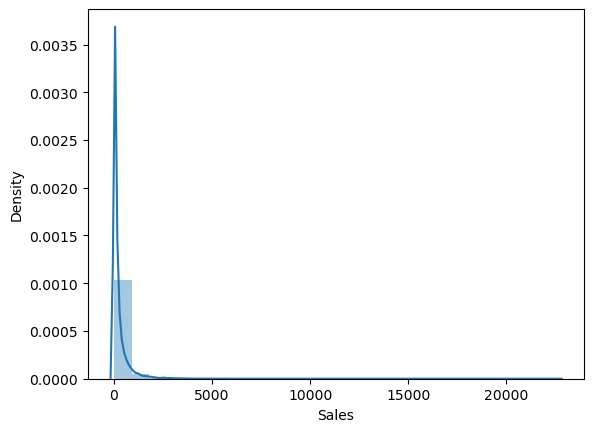

In [13]:
sns.distplot(super_store['Sales'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
super_store['Profit'].mean() # Check the mean

28.610982477675964

In [16]:
super_store['Profit'].median() # Check the median

9.24

In [17]:
super_store['Profit'].max() # Check the max

8399.976

Hypothesis: Profit is determined by the Sales level or volume. 

# 3. Data prep for regression analysis

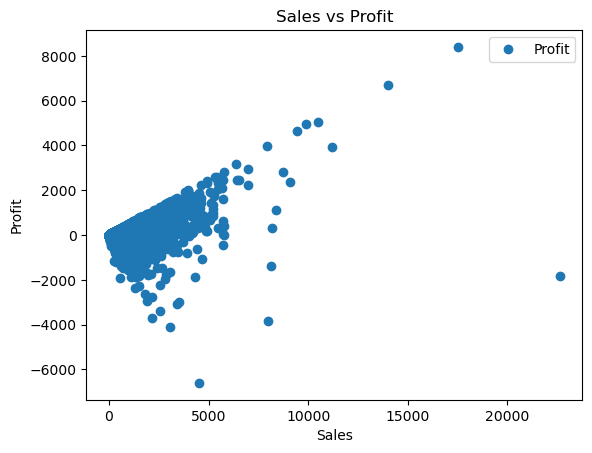

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

super_store.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = super_store['Sales'].values.reshape(-1,1)
y = super_store['Profit'].values.reshape(-1,1)

In [21]:
X

array([[ 19],
       [ 19],
       [ 21],
       ...,
       [ 12],
       [ 90],
       [154]], dtype=int64)

In [22]:
y

array([[ 9.3312],
       [ 9.2928],
       [ 9.8418],
       ...,
       [ 4.2804],
       [33.93  ],
       [51.8238]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

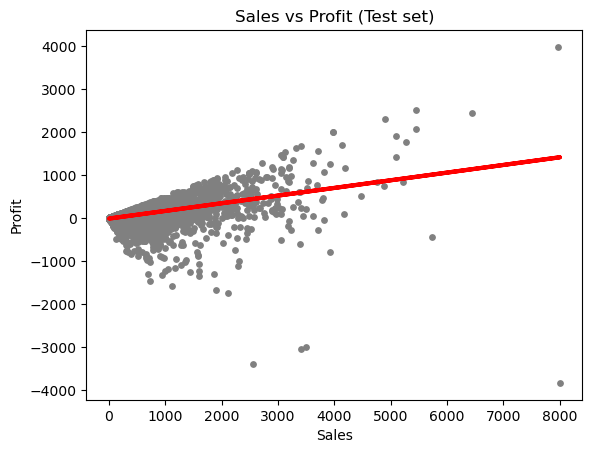

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17832342]]
Mean squared error:  20942.230929192123
R2 score:  0.19258310998237338


Based on the results:

This signifies that for each unit increment in the independent variable of sales, the dependent variable profit rises by approximately 0.178. The slope indicates a weak positive correlation between the variables.
              
The Mean Squared Error (MSE) denotes the average of the squared discrepancies between predicted values and actual data. An elevated MSE signifies that the predictions deviate significantly from the actual values, indicating a low level of model accuracy. The MSE exceeding 20,000 indicates a substantial error in the predictions.
    
The R² score indicates the proportion of variability in the dependent variable that can be explained by the independent variable(s). An R² value of 0.1926 indicates that only 19.26% of the variance in the dependent variable is accounted for by the model. This is relatively low, suggesting that the model fails to adequately capture the relationship between the variables and exhibits limited predictive capability.

Analysis: 

The regression line seems to inadequately represent the data. The slope indicates a marginal positive correlation between the variables; however, the elevated MSE and diminished R² score imply that the model inadequately represents the data. The independent variable is not a robust predictor of the dependent variable, and there may be significant factors absent from the model. It may be advantageous to incorporate additional pertinent features or to contemplate an entirely different model.


In [30]:
y_predicted

array([[  1.61907396],
       [ 77.22820343],
       [-10.86356534],
       ...,
       [ 49.0531033 ],
       [ 50.83633748],
       [ -9.61530141]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.4800,1.619074
1,228.6900,77.228203
2,12.4416,-10.863565
3,-24.2715,106.473244
4,38.9400,38.175375
5,-6.0660,8.752011
6,-47.8320,12.853449
7,224.2800,73.305088
8,-6.3920,-9.793625
9,-376.6932,70.630237


# Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17832342]]
Mean squared error:  24243.006845089112
R2 score:  0.24954059452567445


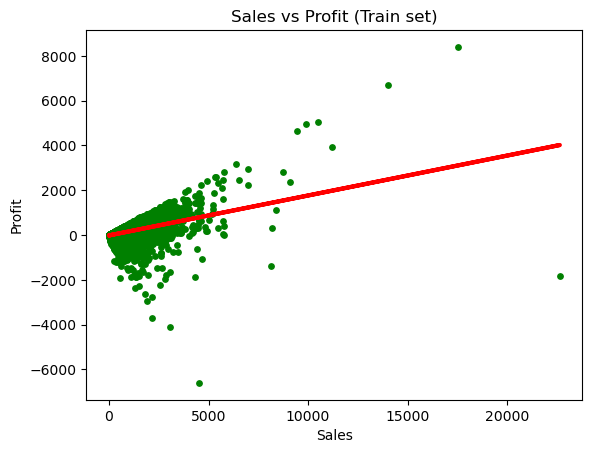

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

Interpretation of Model Performance:

The model exhibits suboptimal performance on the test set. Although a weak positive correlation exists between the independent and dependent variables, the elevated MSE and diminished R² score suggest that the model's predictions lack accuracy. A mere fraction of the variance in the dependent variable is elucidated by the independent variable(s), indicating that the model fails to sufficiently represent the underlying patterns in the data.


Data Bias: Biased training data can impair the model's ability to generalise to previously unseen data. Potential biases may encompass:

Sampling Bias: If the training data fails to accurately represent the overall population, the model may exhibit suboptimal performance on the test set. If the training data is primarily sourced from a particular region or market, the model may encounter difficulties when evaluated on data from other regions.

Feature Bias: When specific features disproportionately influence outcomes in the training data (e.g., excessive dependence on a single predictor), the model may exhibit underfitting or overfitting. The feeble positive slope may indicate that the model is insufficiently predictive based on the input variables.


Conclusion:

The model exhibits subpar performance on the test set, as indicated by the elevated MSE and diminished R² score. The shallow slope signifies a negligible correlation between the variables. Moreover, biases in the data, such as sampling bias and feature bias, may be impairing the model's capacity to generalise. Mitigating potential data bias through enhanced data collection, ensuring dataset diversity, and incorporating additional pertinent features may enhance the model's performance.
